Design a neural network (the choice of implementation model can be pytorch, tensorflow or the whitebox model) for the data set shared in the ML lab assignment for neural networks. 

Develop individual code base using following algorithms for weight optimization:
* Genetic Algorithm
* Cultural Algorithm
* Particle Swarm Optimization
* Ant Colony Optimization

Data to be uploaded to github
* Note on the comparison of performance for the four methods. 
* The codebase for all four methods 
* The research papers that you have referred to.

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Cs\MLT\Datasource\Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [116]:
df.drop(['ID'],inplace=True,axis=1)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [118]:
df.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

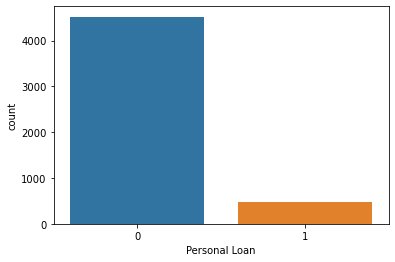

In [119]:
sns.countplot(x='Personal Loan',data=df)

In [120]:
df['Age'] = pd.cut(df['Age'],bins=[23,30,45,67],labels=['Young','Adult','Old'])

In [121]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,Young,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,Adult,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,Adult,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,Adult,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,Adult,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [122]:
df['Age'].value_counts()

Old      2481
Adult    1895
Young     612
Name: Age, dtype: int64

In [123]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])

In [124]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [125]:
col = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 
       'Mortgage', 'Securities Account','CD Account', 'Online', 'CreditCard', 'Personal Loan']
df = df[col]

In [126]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [127]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [128]:
from keras.models import Sequential
from keras.layers import Dense

keras = Sequential()
keras.add(Dense(12,input_dim=12,activation='relu'))
keras.add(Dense(8,activation='relu'))
keras.add(Dense(6,activation='relu'))

In [129]:
keras.add(Dense(1,activation='sigmoid'))

In [130]:
keras.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [131]:
keras.fit(x_train,y_train,epochs=20,batch_size=25)

Epoch 1/20
150/150 [==============================] - 2s 3ms/step - loss: 7.2821 - accuracy: 0.8709
Epoch 2/20
150/150 [==============================] - 0s 3ms/step - loss: 0.4301 - accuracy: 0.8800
Epoch 3/20
150/150 [==============================] - 0s 3ms/step - loss: 0.5183 - accuracy: 0.8664
Epoch 4/20
150/150 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8901
Epoch 5/20
150/150 [==============================] - 0s 2ms/step - loss: 0.3706 - accuracy: 0.9019
Epoch 6/20
150/150 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.9019
Epoch 7/20
150/150 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8963
Epoch 8/20
150/150 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.9019
Epoch 9/20
150/150 [==============================] - 0s 3ms/step - loss: 0.3619 - accuracy: 0.9019
Epoch 10/20
150/150 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.9019

In [132]:
_,acc = keras.evaluate(x_train,y_train)
print(acc*100)

118/118 [==============================] - 1s 2ms/step - loss: 0.3387 - accuracy: 0.9019
90.18666744232178


In [133]:
y_pred = keras.predict(x_test)
y_pred = (y_pred>0.5)

40/40 [==============================] - 0s 3ms/step


In [134]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9104

In [135]:
from keras import backend as K
def r_loss(y_test,y_pred):
    res=K.sum(K.square(y_test-y_pred))    
    total=K.sum(K.square(y_test-K.mean(y_test)))
    return 1-(1-res/(total+K.epsilon()))

## Ant Colony Optimisation

In [136]:
df.head(1)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,2,1,49,91107,4,1.6,1,0,1,0,0,0,0


In [137]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [140]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.weights2 = np.random.randn(hidden_size, output_size)
    
    def forward(self, X):
        self.hidden = np.maximum(0, np.dot(X, self.weights1))
        self.output = np.dot(self.hidden, self.weights2)
        return self.output
    
    def backward(self, X, y, output):
        delta2 = output - y
        dweights2 = np.dot(self.hidden.T, delta2)
        delta1 = np.dot(delta2, self.weights2.T) * (self.hidden > 0)
        dweights1 = np.dot(X.T, delta1)
        return dweights1, dweights2

In [141]:
class AntColony:
    def __init__(self, n_ants, n_iterations, alpha, beta, rho, Q):
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.Q = Q
        
    def run(self, nn, X_train, y_train):
        pheromone = np.zeros(nn.weights1.shape)
        best_weights1 = nn.weights1
        best_weights2 = nn.weights2
        best_acc = 0
        
        for iteration in range(self.n_iterations):
            for ant in range(self.n_ants):
                weights1 = nn.weights1 + pheromone
                nn.weights1 = weights1
                output = nn.forward(X_train)
                acc = accuracy(output, y_train)
                dweights1, dweights2 = nn.backward(X_train, y_train, output)
                pheromone = self.rho * pheromone + self.Q * (dweights1 / acc)
                
                if acc > best_acc:
                    best_acc = acc
                    best_weights1 = nn.weights1
                    best_weights2 = nn.weights2
            
            nn.weights1 = best_weights1
            nn.weights2 = best_weights2
        
        return nn

In [142]:
def accuracy(y_pred, y_true):
    y_pred = np.argmax(y_pred, axis=1)
    return np.mean(y_pred == y_true)

In [160]:
nn = NeuralNetwork(X_train.shape[1], 100, 2)
aco = AntColony(n_ants=10, n_iterations=100, alpha=1, beta=2, rho=0.5, Q=100)

nn = aco.run(nn, X_train, y_train)
output = nn.forward(X_test)
acc = accuracy(output, y_test)
print(f'Test accuracy: {acc:.2f}')

Test accuracy: 0.85


In [161]:
X_train.shape

(3750, 12)

In [162]:
y_train.shape

(3750,)